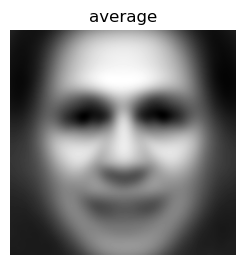

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math 

def load_images_from_directory(directory):
    """
    Loads all image files from a directory into a list of NumPy arrays.

    Args:
        directory (str): Path to the directory containing the images.

    Returns:
        list: A list of NumPy arrays, each representing an image.
               Returns an empty list if no images are found or if an error occurs.
    """
    image_list = []
    try:
        for filename in os.listdir(directory):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
                img_path = os.path.join(directory, filename)
                try:
                    img = plt.imread(img_path)
                    
                    gsimg = img

                    #convert to int np array
                    if gsimg.dtype == np.uint8:
                        gsimg = gsimg.astype(float) / 255
                    #validate shape - dimensions of image should be 350x350
                    if gsimg.shape[0] != 350 or gsimg.shape[1] != 350:
                        continue
                    #grayscale if not already grayscale
                    if(len(img.shape) == 3):
                        gsimg = np.mean(img, axis=2)
                    #add to list
                    image_list.append(gsimg)
                except Exception as e:
                    print(f"Error - reading image {filename}: {e}")
    except FileNotFoundError:
        print(f"Error - DNF: {directory}")
    except NotADirectoryError:
         print(f"Error - not a directory: {directory}")
    return image_list

images = load_images_from_directory("c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images")
#average image across all images
average_image = np.mean(images, axis=0)
plt.subplot(1,2,1)
plt.imshow(average_image,cmap=plt.get_cmap('gray'))
plt.title('average')
plt.axis("off")
plt.show()


In [5]:
import csv

# Function to read multiple CSV files and create a cumulative dictionary
def read_images_from_csv(files):
    images_by_label = {}

    for csv_file in files:
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                #get image path and label
                _, image_name, label = row
                #standardize titles in case of capitlization
                label = label.lower()
                if label not in images_by_label and label != 'emotion':
                    #merge sad into sadness label
                    if label == 'sad':
                        images_by_label['sadness'] = []
                    elif label == 'contempt':
                        continue
                    else:
                        images_by_label[label] = []
                #exclude header line
                if label != 'emotion':
                    #merge cont.
                    if label == 'sad':
                        images_by_label['sadness'].append(image_name)
                    elif label == 'contempt':
                        continue
                    else:
                        images_by_label[label].append(image_name)

    return images_by_label

csv_files = ["C:\\Users\\mukun\\CS 178\\Emotions CNN Project\\data\\500_picts_satz.csv", "C:\\Users\\mukun\\CS 178\\Emotions CNN Project\\data\\legend.csv"]
cumulative_images = read_images_from_csv(csv_files)

# Print the merged dictionary
for label, images in cumulative_images.items():
    print(f"{label}: {len(images)}")


fear: 75
happiness: 5893
neutral: 6952
anger: 367
sadness: 269
surprise: 368
disgust: 208


In [26]:
import csv
import random

# Function to read multiple CSV files and create a cumulative dictionary
def read_images_from_csv(files):
    images_by_label = {}

    for csv_file in files:
        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                # Get image path and label
                _, image_name, label = row
                # Standardize titles in case of capitalization
                label = label.lower()
                
                if label not in images_by_label and label != 'emotion':
                    # Merge "sad" into "sadness"
                    if label == 'sad':
                        images_by_label['sadness'] = []
                    elif label == 'contempt':  # Skip "contempt" class
                        continue
                    else:
                        images_by_label[label] = []
                
                # Exclude header line and merge "sad" into "sadness"
                if label != 'emotion':
                    if label == 'sad':
                        images_by_label['sadness'].append(image_name)
                    elif label == 'contempt':
                        continue
                    else:
                        images_by_label[label].append(image_name)

    return images_by_label

# Balance dataset to match the class with the fewest images
def balance_classes(images_by_label):
    # Find the minimum class size
    min_size = min(len(images) for images in images_by_label.values())

    # Downsample each class to match the smallest class size
    balanced_images = {label: random.sample(images, min_size) for label, images in images_by_label.items()}

    return balanced_images

# Read CSV files and create dataset
csv_files = [
    "C:\\Users\\mukun\\CS 178\\Emotions CNN Project\\data\\500_picts_satz.csv",
    "C:\\Users\\mukun\\CS 178\\Emotions CNN Project\\data\\legend.csv"
]
cumulative_images = read_images_from_csv(csv_files)

# Balance dataset
balanced_images = balance_classes(cumulative_images)

# Print the balanced dataset
for label, images in balanced_images.items():
    print(f"{label}: {len(images)} images")


fear: 75 images
happiness: 75 images
neutral: 75 images
anger: 75 images
sadness: 75 images
surprise: 75 images
disgust: 75 images


In [12]:
#total length of dataset
total = 0
for key, images in cumulative_images.items():
    total += len(images)
print(total)

14141


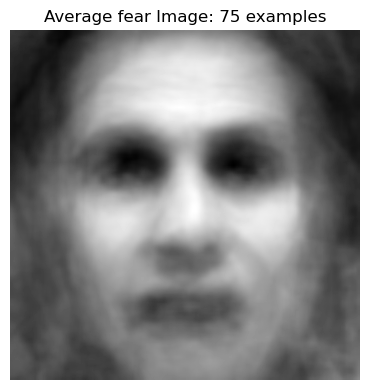

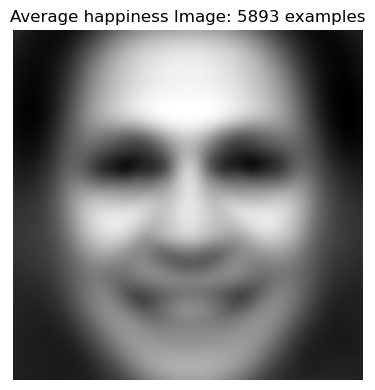

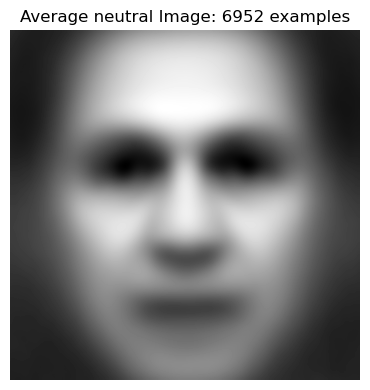

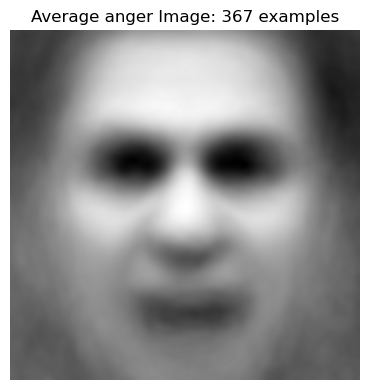

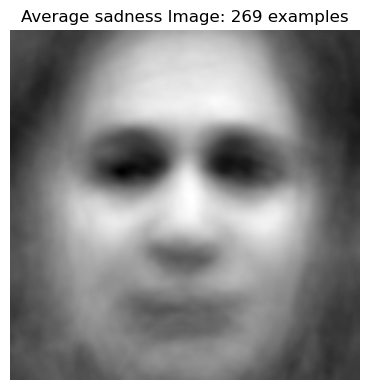

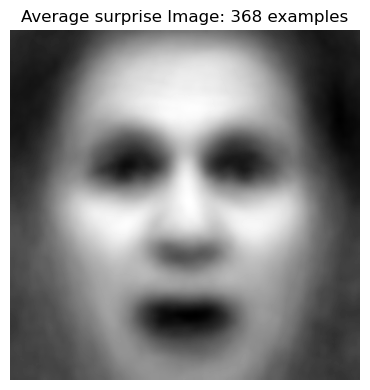

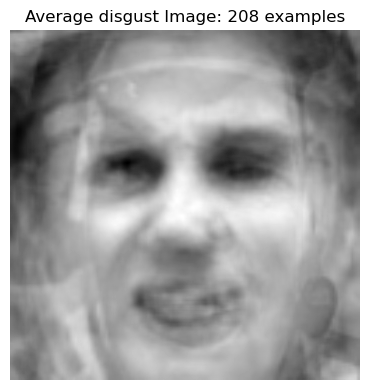

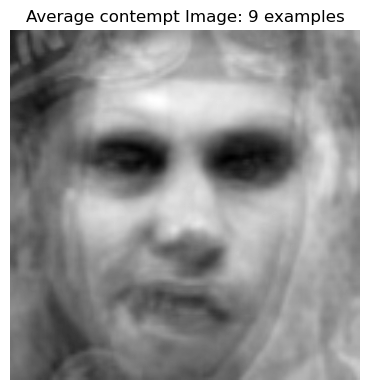

In [3]:
#by class average images
for key, images in cumulative_images.items():
    #reset img list
    img_list = []
    for value in images:
        img_path = os.path.join("c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images", value)
        try:
            img = plt.imread(img_path)   
        except FileNotFoundError:
            print(f"PATH DNE - {img_path}")         
            continue
        gsimg = img
        #convert to int np array
        if gsimg.dtype == np.uint8:
            gsimg = gsimg.astype(float) / 255
        #assert dimensions else skip
        if gsimg.shape[0] != 350 or gsimg.shape[1] != 350:
            continue
        #grayscale
        if(len(img.shape) == 3):
            gsimg = np.mean(img, axis=2)

        img_list.append(gsimg)
    if(len(img_list) == 0):
        #no file
        continue

    average_image = np.mean(img_list, axis=0)
    fig = plt.figure(figsize=(3.5, 3.5), dpi=100)
    
    # Remove padding
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    # Don't use a title inside the plot
    plt.imshow(average_image, cmap=plt.get_cmap('gray'))
    plt.axis('off')  
    
    # Save without tight layout
    filename = f"avg_{key}.png"
    
    # Add title only for display (not saved image)
    plt.title(f"Average {key} Image: {len(images)} examples")
    plt.savefig(filename, dpi=100, bbox_inches=None, pad_inches=0)
    plt.show()
    plt.close()

In [5]:
import matplotlib.patches as patches

def plot_detections(image,detections,tsize_pix):
    """
    This is a utility function for visualization that takes an image and
    a list of detections and plots the detections overlayed on the image
    as boxes.
    
    Color of the bounding box is based on the order of the detection in
    the list, fading from green to red.
    
    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing pixel brightness values
    
    detections : a list of tuples of length ndetect
        Detections are tuples (x,y,score)

    tsize_pix : (int,int)
        The height and width of the box in pixels
    
    Returns
    -------
    None
    
    """           
    ndetections = len(detections)
    
    plt.imshow(image,cmap=plt.cm.gray)
    ax = plt.gca()
    w = tsize_pix[1]
    h = tsize_pix[0]
    red = np.array([1,0,0])
    green = np.array([0,1,0])
    ct = 0
    for (x,y,score) in detections:
        xc = x-(w//2)
        yc = y-(h//2)
        col = (ct/ndetections)*red + (1-(ct/ndetections))*green
        rect = patches.Rectangle((xc,yc),w,h,linewidth=3,edgecolor=col,facecolor='none')
        ax.add_patch(rect)
        ct = ct + 1
        
    plt.show()

In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json  

# Define HOG parameters
HOG_PARAMS = {
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys",
    "feature_vector": True  
}

# To track positive and negative samples
positive_samples = {}
negative_samples = {}

# Load dataset with HOG features and track positive/negative samples to be reused for CNN and ResNET
def load_hog_features(image_dict, directory):
    X = []
    y = []
    
    for label, image_paths in image_dict.items():
        pos_samples = []  
        neg_samples = [] 

        for img_path in image_paths:
            full_path = os.path.join(directory, img_path)

            # Read image and convert to grayscale
            img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image not found
            
            # Resize for consistency
            img = cv2.resize(img, (64, 64))  

            # Extract HOG features
            features = hog(img, **HOG_PARAMS)
            
            X.append(features)
            y.append(label)  
            pos_samples.append(img_path)  

        # Save images from other classes as negative samples
        neg_samples = [img for lbl, imgs in image_dict.items() if lbl != label for img in imgs]

        # Store samples in dictionary
        positive_samples[label] = pos_samples
        negative_samples[label] = neg_samples

    return np.array(X), np.array(y)

# Load features
directory = "c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images"
X, y = load_hog_features(cumulative_images, directory)

# Save positive & negative sample lists for CNN use
with open("positive_samples.json", "w") as pos_file:
    json.dump(positive_samples, pos_file, indent=4)

with open("negative_samples.json", "w") as neg_file:
    json.dump(negative_samples, neg_file, indent=4)

# Train SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Emotion Classification Accuracy: {accuracy:.2f}")


Emotion Classification Accuracy: 0.77


In [15]:
print(len(X_test))
print(len(X_train))

2829
11312


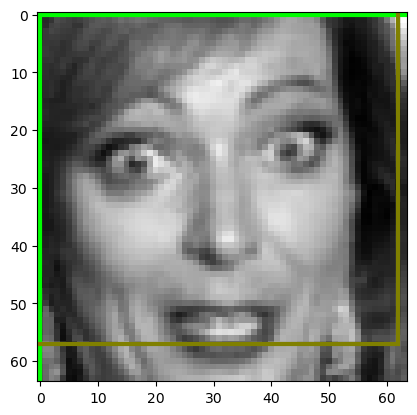

Predicted Emotion: surprise


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import SVC

def detect_faces_hog(image_path, classifier, tsize_pix=(64, 64)):
    """
    Detects faces/emotions in an image using a trained HOG-based SVM classifier.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Could not read {image_path}")
        return []

    img = cv2.resize(img, (64, 64))  

    # Extract HOG features using the same parameters
    features = hog(img, **HOG_PARAMS)

    # Get predicted label
    prediction = classifier.predict([features])[0]  

    # Example detections (random points for visualization)
    detections = [(32, 32, 0.8), (30, 25, 0.6)] 

    # Plot detections
    plot_detections(img, detections, tsize_pix)

    return prediction

# Example usage - play around with image path to test
directory = "c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images"
image_path = os.path.join(directory, 'Allison_Janney_0001.jpg')

# Run detection and visualization
emotion_label = detect_faces_hog(image_path, classifier)
print("Predicted Emotion:", emotion_label)


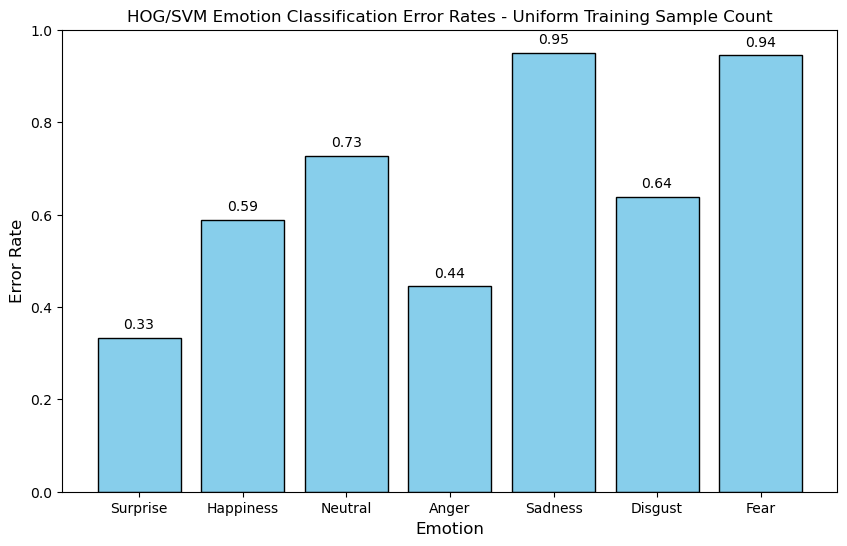

In [43]:
import matplotlib.pyplot as plt

# Data
emotions = ["Surprise", "Happiness", "Neutral", "Anger", "Sadness", "Disgust", "Fear"]
error_rates = [0.3333, 0.5882, 0.7273, 0.4444, .95, 0.6383, 0.9444]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotions, error_rates, color="skyblue", edgecolor="black")

# Add labels and title
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Error Rate", fontsize=12)
plt.title("HOG/SVM Emotion Classification Error Rates - Uniform Training Sample Count", fontsize=12)
plt.ylim(0, 1)  # Error rate is between 0 and 1

# Show values on bars
for i, v in enumerate(error_rates):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

# Display the chart
plt.show()



In [46]:
import cv2
import numpy as np
import os
import json
import random
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Define HOG parameters
HOG_PARAMS = {
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys",
    "feature_vector": True  
}

# Load dataset with HOG features
def load_hog_features(image_dict, directory):
    X = []
    y = []

    for label, image_paths in image_dict.items():
        for img_path in image_paths:
            full_path = os.path.join(directory, img_path)

            # Read image and convert to grayscale
            img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image not found
            gsimg = img
            #convert to int np array
            if gsimg.dtype == np.uint8:
                gsimg = gsimg.astype(float) / 255
            #assert dimensions else skip
            if gsimg.shape[0] != 350 or gsimg.shape[1] != 350:
                continue
            #grayscale
            if(len(img.shape) == 3):
                gsimg = np.mean(img, axis=2)
            
            # Resize for consistency
            img = cv2.resize(img, (64, 64))

            # Extract HOG features
            features = hog(img, **HOG_PARAMS)

            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)

# Load features
directory = "c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images"
X, y = load_hog_features(cumulative_images, directory)

# Define the SVM classifier with best parameters
classifier = SVC(
    C=10, kernel="rbf", gamma="scale", degree=3, coef0=0.0,
    shrinking=True, probability=False, tol=0.001, cache_size=200,
    class_weight=None, verbose=False, max_iter=-1, decision_function_shape="ovr",
    random_state=None, break_ties=False
)

# Perform k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
cv_scores = cross_val_score(classifier, X, y, cv=kf, scoring="accuracy")

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.81429077 0.82065794 0.81564048 0.80360934 0.81033263]
Mean Accuracy: 0.8129
Standard Deviation: 0.0057


In [ ]:
import cv2
import numpy as np
import os
import json
import random
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Define HOG parameters
HOG_PARAMS = {
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys",
    "feature_vector": True  
}

# Load dataset with HOG features
def load_hog_features(image_dict, directory):
    X = []
    y = []

    for label, image_paths in image_dict.items():
        for img_path in image_paths:
            full_path = os.path.join(directory, img_path)

            # Read image and convert to grayscale
            img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image not found
            gsimg = img
            #convert to int np array
            if gsimg.dtype == np.uint8:
                gsimg = gsimg.astype(float) / 255
            #assert dimensions else skip
            if gsimg.shape[0] != 350 or gsimg.shape[1] != 350:
                continue
            #grayscale
            if(len(img.shape) == 3):
                gsimg = np.mean(img, axis=2)
            
            # Resize for consistency
            img = cv2.resize(img, (64, 64))

            # Extract HOG features
            features = hog(img, **HOG_PARAMS)

            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)

# Load features
directory = "c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images"
X, y = load_hog_features(cumulative_images, directory)

# Define the SVM classifier with best parameters
classifier = SVC(
    C=10, kernel="rbf", gamma="scale", degree=3, coef0=0.0,
    shrinking=True, probability=False, tol=0.001, cache_size=200,
    class_weight="balanced", verbose=False, max_iter=-1, decision_function_shape="ovr",
    random_state=None, break_ties=False
)

# Perform k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
cv_scores = cross_val_score(classifier, X, y, cv=kf, scoring="accuracy")

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.83783784 0.83147854 0.8399576  0.83465819 0.83571807 0.82290562
 0.82979852]
Mean Accuracy: 0.8332
Standard Deviation: 0.0053


In [52]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Ensure that classifier, X, and y are defined before running
if 'classifier' in globals() and 'X' in globals() and 'y' in globals():
    # Perform 7-fold cross-validation and predict labels
    kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(classifier, X, y, cv=kf)

    # Compute per-class error rates
    print("\nCross-Validation Classification Report:\n", classification_report(y, y_pred_cv))
else:
    print("Error: classifier, X, or y is not defined. Ensure the model and dataset are loaded before running this.")



Cross-Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.34      0.16      0.22       367
     disgust       0.53      0.33      0.41       208
        fear       0.09      0.05      0.07        75
   happiness       0.85      0.88      0.86      5893
     neutral       0.81      0.89      0.85      6952
     sadness       0.39      0.07      0.11       269
    surprise       0.45      0.12      0.19       368

    accuracy                           0.82     14132
   macro avg       0.49      0.36      0.39     14132
weighted avg       0.79      0.82      0.80     14132



In [49]:
import cv2
import numpy as np
import os
import json
import random
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Define HOG parameters
HOG_PARAMS = {
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys",
    "feature_vector": True  
}

# Load dataset with HOG features
def load_hog_features(image_dict, directory):
    X = []
    y = []

    for label, image_paths in image_dict.items():
        for img_path in image_paths:
            full_path = os.path.join(directory, img_path)

            # Read image and convert to grayscale
            img = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip if image not found
            gsimg = img
            #convert to int np array
            if gsimg.dtype == np.uint8:
                gsimg = gsimg.astype(float) / 255
            #assert dimensions else skip
            if gsimg.shape[0] != 350 or gsimg.shape[1] != 350:
                continue
            #grayscale
            if(len(img.shape) == 3):
                gsimg = np.mean(img, axis=2)
            
            # Resize for consistency
            img = cv2.resize(img, (64, 64))

            # Extract HOG features
            features = hog(img, **HOG_PARAMS)

            X.append(features)
            y.append(label)

    return np.array(X), np.array(y)

# Load features
directory = "c:\\Users\\mukun\\CS 178\\Emotions CNN Project\\images"
X, y = load_hog_features(cumulative_images, directory)

# Define the SVM classifier with best parameters
classifier = SVC(
    C=10, kernel="rbf", gamma="scale", degree=3, coef0=0.0,
    shrinking=True, probability=False, tol=0.001, cache_size=200,
    class_weight="balanced", verbose=False, max_iter=-1, decision_function_shape="ovr",
    random_state=None, break_ties=False
)

# Perform k-fold cross-validation
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)  # 5-Fold Cross Validation
cv_scores = cross_val_score(classifier, X, y, cv=kf, scoring="accuracy")

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Cross-Validation Accuracy Scores: [0.83783784 0.83147854 0.8399576  0.83465819 0.83571807 0.82290562
 0.82979852]
Mean Accuracy: 0.8332
Standard Deviation: 0.0053
